### A CLASSIFICATION PROJECT - CUSTOMER CHURN ANALYSIS

#### PROJECT SCENARIO
As a data scientist at Vodafone Corporation, a large telecommunication company.
* Vodafone want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.
* To do this, the business development unit has provided you with data to build a series of machine learning models to predict customer churn.
* The marketing and sales team as well have provided you with some data to aid this endeavor.


#### PROJECT DESCRIPTION
 Telecommunication companies face the ongoing challenge of customer churn, where subscribers discontinue services and switch to competitors. 
 To address this issue and proactively retain customers, we are undertaking a customer churn analysis project utilizing machine learning techniques. 
 In this project, we explore how machine learning techniques can be leveraged for customer churn analysis in telecommunication networks, following the well-established CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. The primary objective of this project is to develop predictive models that can accurately identify customers at risk of churn in our telecommunication network.


#### BUSINESS UNDERSTANDING
In today's highly competitive telecommunication industry, customer churn, or the loss of customers to competitors, poses a significant challenge for companies striving to maintain market share and profitability. 
Identifying customers at risk of churn and implementing proactive retention strategies is crucial for sustaining business growth.

##### HYPOTHESIS
NULL HYPOTHESIS: There is no relationship between the tenure and the churn of customers.

ALTERNATE HYPOTHESIS: There is a relationship between the tenure and the churn of customers.

##### ANALYTICAL QUESTIONS
1. What is the overall churn rate of the telecommunication company?
2. Does churn rate differ based on the payment method?
3. What is the churn rate of customers based on their seniority?
4. What is the churn rate of customers based on their monthlycharges?
5. What is the churn rate of customers based on their contract type?
6. What is the churn rate of customers based on their gender?

#### DATA UNDERSTANDING

##### Loading the necessary libraries

In [650]:
import numpy as np
import pandas as pd
import os
import pyodbc
from dotenv import load_dotenv
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from tabulate import tabulate
#Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

##### Load the datasets

In [651]:
#Loading first dataset from database
# Load environment variables from .env file
environment_variables = dotenv_values('.env')

# Access database credentials from environment variables dictionary
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
password = environment_variables.get("PASSWORD")
username = environment_variables.get("USERNAME")

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};User Id={username};PASSWORD={password};"

print("USERNAME:", username)

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};"
# Connect to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print("Error:", e)

# Specify the SQL queries to extract data from the tables
Dataset1 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# Suppress warnings
warnings.filterwarnings('ignore')

# Create a cursor from the connection
with connection.cursor() as cursor:
    # Execute the queries and fetch data into Pandas DataFrames
    Dataset1 = pd.read_sql_query(Dataset1, connection)

USERNAME: LP2_project
Connection successful!


In [652]:
#Preview the first dataset
Dataset1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [653]:
#Load the second the dataset
Dataset2 = pd.read_csv("./Dataset/LP2_Telco-churn-second-2000.csv")
Dataset2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [654]:
#Check the columns
column_names = Dataset1.columns
print(column_names)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [655]:
#Check the columns
column_names = Dataset2.columns
print(column_names)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [656]:
#Check the number of rows and columns
Dataset1.shape

(3000, 21)

In [657]:
#Check the number of rows and columns
Dataset2.shape

(2043, 21)

##### Observations
1. The outputs show both datasets have the same column names and number of columns so they can be merged easily.
2. However, some of the column names are in upper case so they will be converted to lower case.

In [658]:
#Convert column names to lower case
Dataset1.columns = Dataset1.columns.str.lower()

#Check the columns to confirm
column_names = Dataset1.columns
print(column_names)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [659]:
#Convert column names to lower case
Dataset2.columns = Dataset2.columns.str.lower()

#Check the columns to confirm
column_names = Dataset2.columns
print(column_names)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [660]:
#Check cell values
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   seniorcitizen     3000 non-null   bool   
 3   partner           3000 non-null   bool   
 4   dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   phoneservice      3000 non-null   bool   
 7   multiplelines     2731 non-null   object 
 8   internetservice   3000 non-null   object 
 9   onlinesecurity    2349 non-null   object 
 10  onlinebackup      2349 non-null   object 
 11  deviceprotection  2349 non-null   object 
 12  techsupport       2349 non-null   object 
 13  streamingtv       2349 non-null   object 
 14  streamingmovies   2349 non-null   object 
 15  contract          3000 non-null   object 
 16  paperlessbilling  3000 non-null   bool   


##### This shows there are empty cells in these columns; multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, totalcharges and churn. They will be treated accordingly.

In [661]:
#Check cell values
Dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   seniorcitizen     2043 non-null   int64  
 3   partner           2043 non-null   object 
 4   dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   phoneservice      2043 non-null   object 
 7   multiplelines     2043 non-null   object 
 8   internetservice   2043 non-null   object 
 9   onlinesecurity    2043 non-null   object 
 10  onlinebackup      2043 non-null   object 
 11  deviceprotection  2043 non-null   object 
 12  techsupport       2043 non-null   object 
 13  streamingtv       2043 non-null   object 
 14  streamingmovies   2043 non-null   object 
 15  contract          2043 non-null   object 
 16  paperlessbilling  2043 non-null   object 


##### This shows there are no empty cells in any of the columns but some of the columns have the wrong datatype. This will be taken care of accordingly.

In [662]:
#Check for the unique values of each column
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset1
check_unique_values(Dataset1)

Unique values in column 'customerid': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'seniorcitizen': [False  True]
Unique values in column 'partner': [ True False]
Unique values in column 'dependents': [False  True]
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'phoneservice': [False  True]
Unique values in column 'multiplelines': [None False True]
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': [False True None]
Unique values in column 'onlinebackup': [True False None]
Unique values in column 'deviceprotection': [False True None]
Unique values in column 'techsupport': [

In [663]:
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset2
check_unique_values(Dataset2)

Unique values in column 'customerid': ['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Male' 'Female']
Unique values in column 'seniorcitizen': [0 1]
Unique values in column 'partner': ['No' 'Yes']
Unique values in column 'dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
Unique values in column 'phoneservice': ['Yes' 'No']
Unique values in column 'multiplelines': ['No' 'No phone service' 'Yes']
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'onlinebackup': ['No' 'Yes' 'No internet service']
Unique values in column 'deviceprotection': ['No' 'Yes' 'No internet serv

##### The 'True' and 'False' values in the first dataset will be replaced with 'Yes' and 'No' to ensure both datasets have the same values before they are merged.

In [664]:
#Replace the "True" and "False" values in Dataset1
def replace_true_false(df):
    df.replace({True: 'Yes', False: 'No'}, inplace=True)

replace_true_false(Dataset1)

In [665]:
#Check Dataset1 to confirm
Dataset1.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [666]:
#Replace the values in seniorcitizen column
def replace_yes_no_with_1_0(df):
    df['seniorcitizen'] = df['seniorcitizen'].replace({'Yes': 1, 'No': 0})

replace_yes_no_with_1_0(Dataset1)

In [667]:
#Check Dataset1 to confirm
Dataset1.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


##### Since the columns and values for both datasets are similar now, we will merge both datasets.

In [668]:
#Merge both datasets
df = pd.concat([Dataset1, Dataset2], axis=0)

In [669]:
#Check merged dataframe
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [670]:
#Check rows and columns
df.shape

(5043, 21)

In [671]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 
 17  

##### The 'totalcharges' column has the wrong datatype. It will be converted into a float. 

In [672]:
#Convert 'totalcharges' column to numeric (float)
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [673]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 
 17  

In [674]:
#Check for duplicates
df.duplicated().sum()

0

In [675]:
#Check missing values
df.isna().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

##### Check the columns

In [676]:
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset2
check_unique_values(df)

Unique values in column 'customerid': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'seniorcitizen': [0 1]
Unique values in column 'partner': ['Yes' 'No']
Unique values in column 'dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'phoneservice': ['No' 'Yes']
Unique values in column 'multiplelines': [None 'No' 'Yes' 'No phone service']
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': ['No' 'Yes' None 'No internet service']
Unique values in column 'onlinebackup': ['Yes' 'No' None 'No internet service']
Unique values in column 'deviceprotection': ['No' 'Yes' No

##### Univariate Analysis

##### Distribution of Categorical Variables

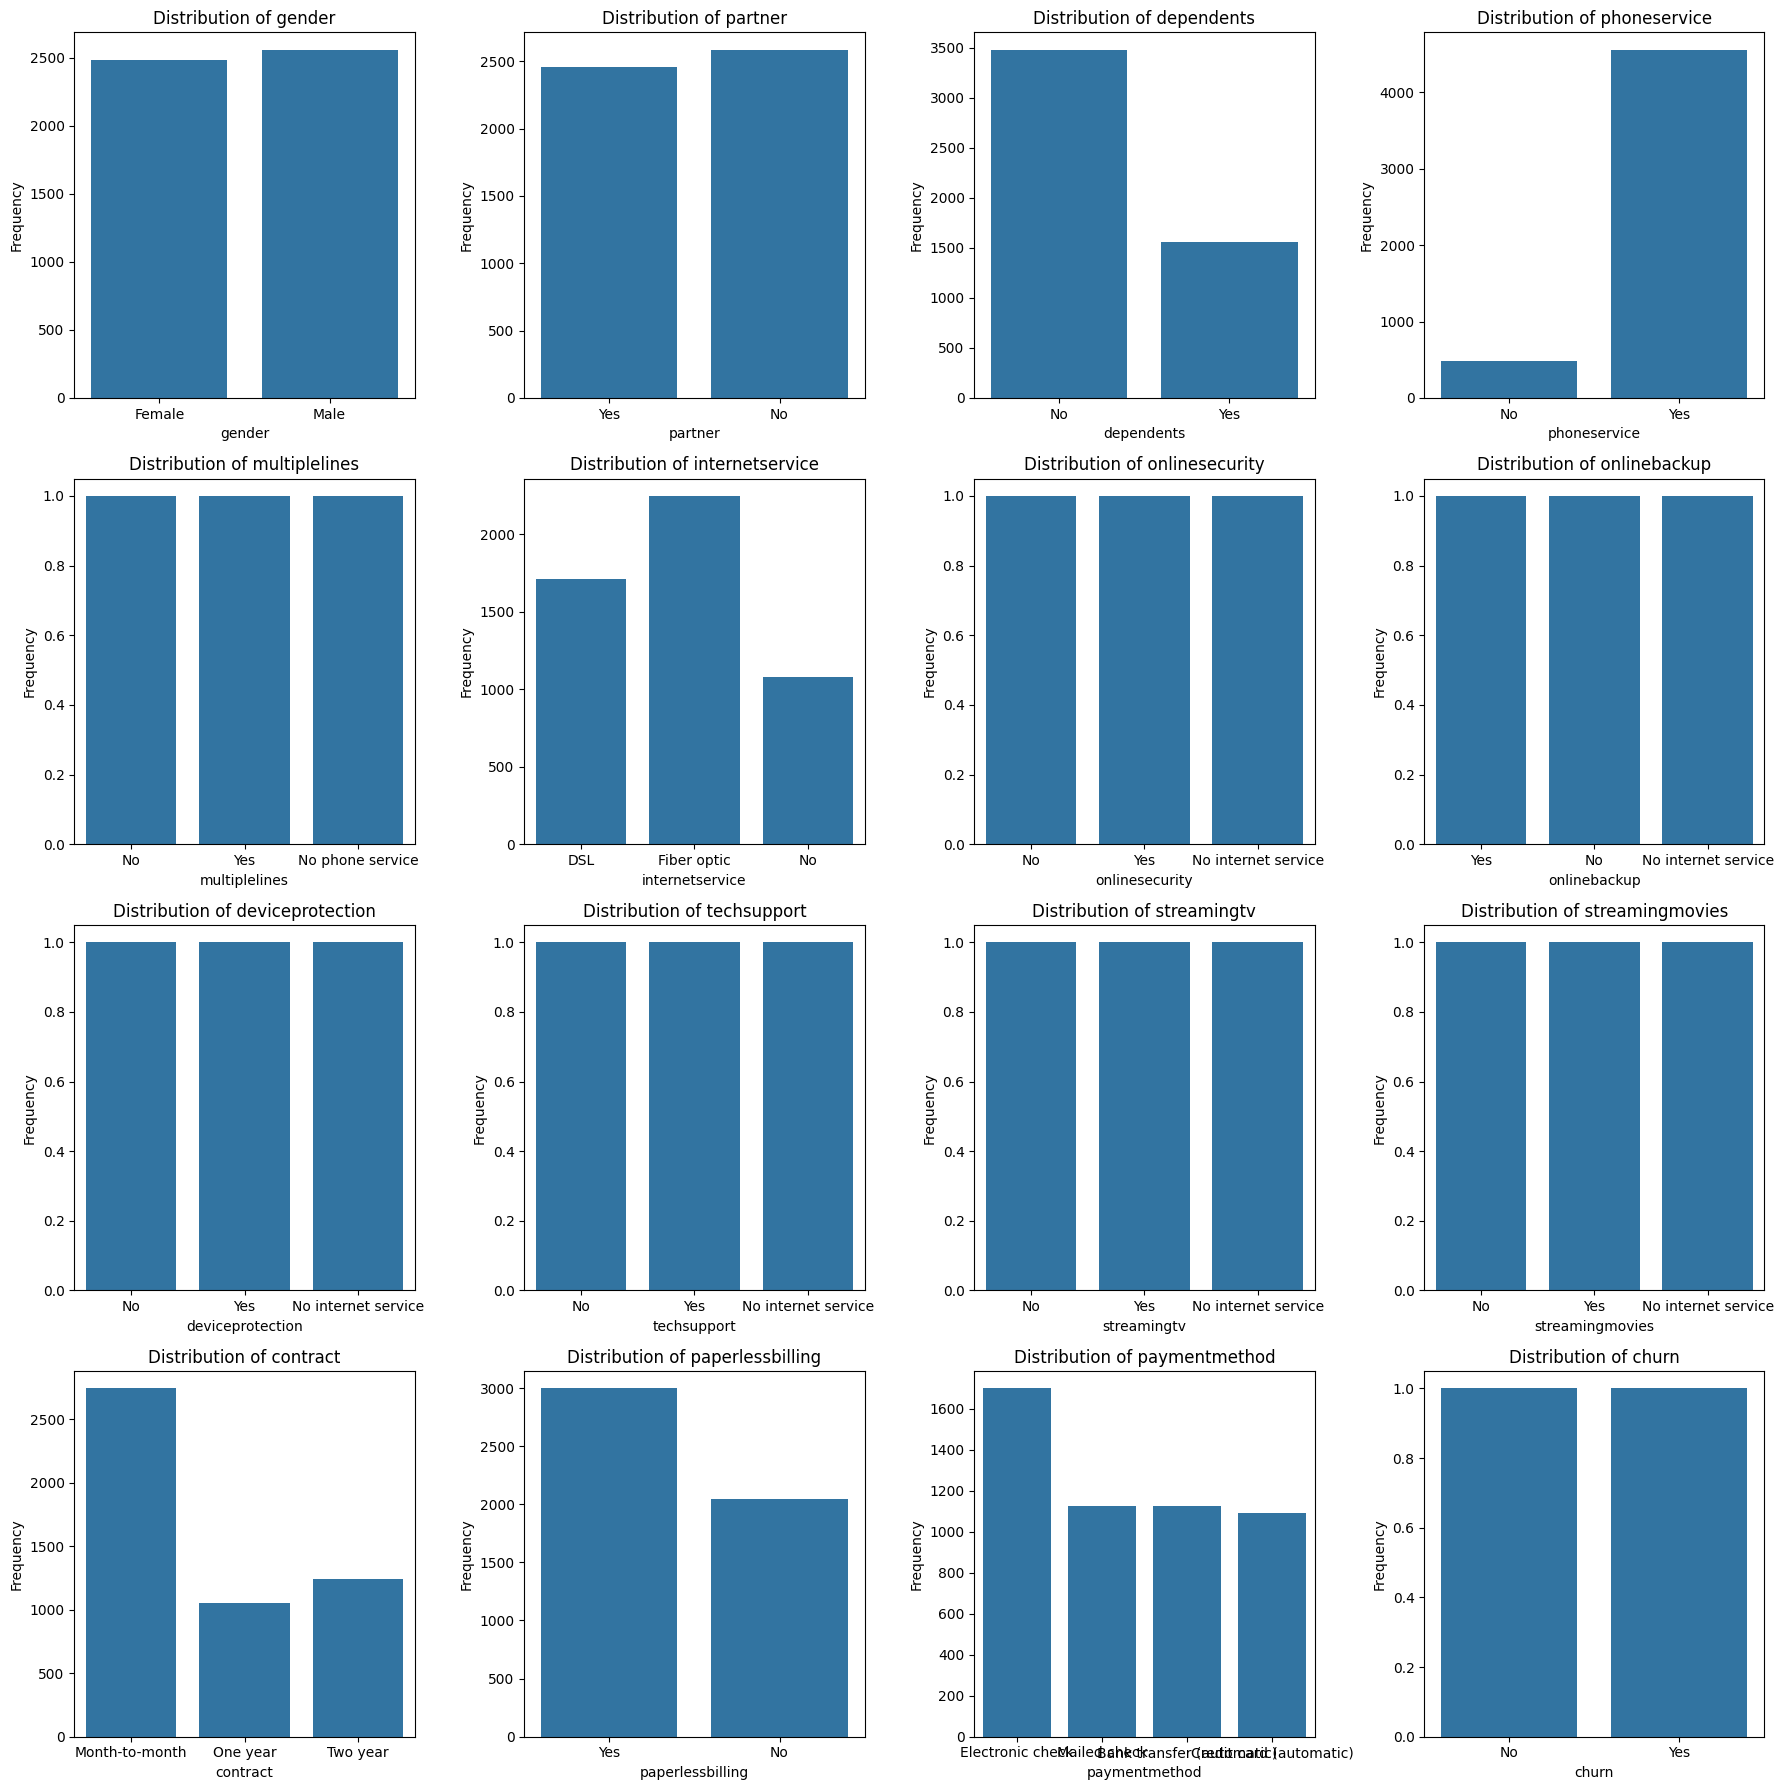

In [677]:

#List of categorical columns
categorical_columns = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
                       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                       'techsupport', 'streamingtv', 'streamingmovies', 'contract', 
                       'paperlessbilling', 'paymentmethod', 'churn']

#Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()

#Loop through each categorical column and plot the frequency of each category
for i, column in enumerate(categorical_columns):
    #Check for duplicate labels and drop them
    unique_values = df[column].unique()
    if len(unique_values) != df[column].nunique():
        df_unique = df.drop_duplicates(subset=column)
        sns.countplot(x=column, data=df_unique, ax=axes[i])
    else:
        sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

#Adjust layout
plt.tight_layout()
plt.show()

##### Distribution of Numerical Variables

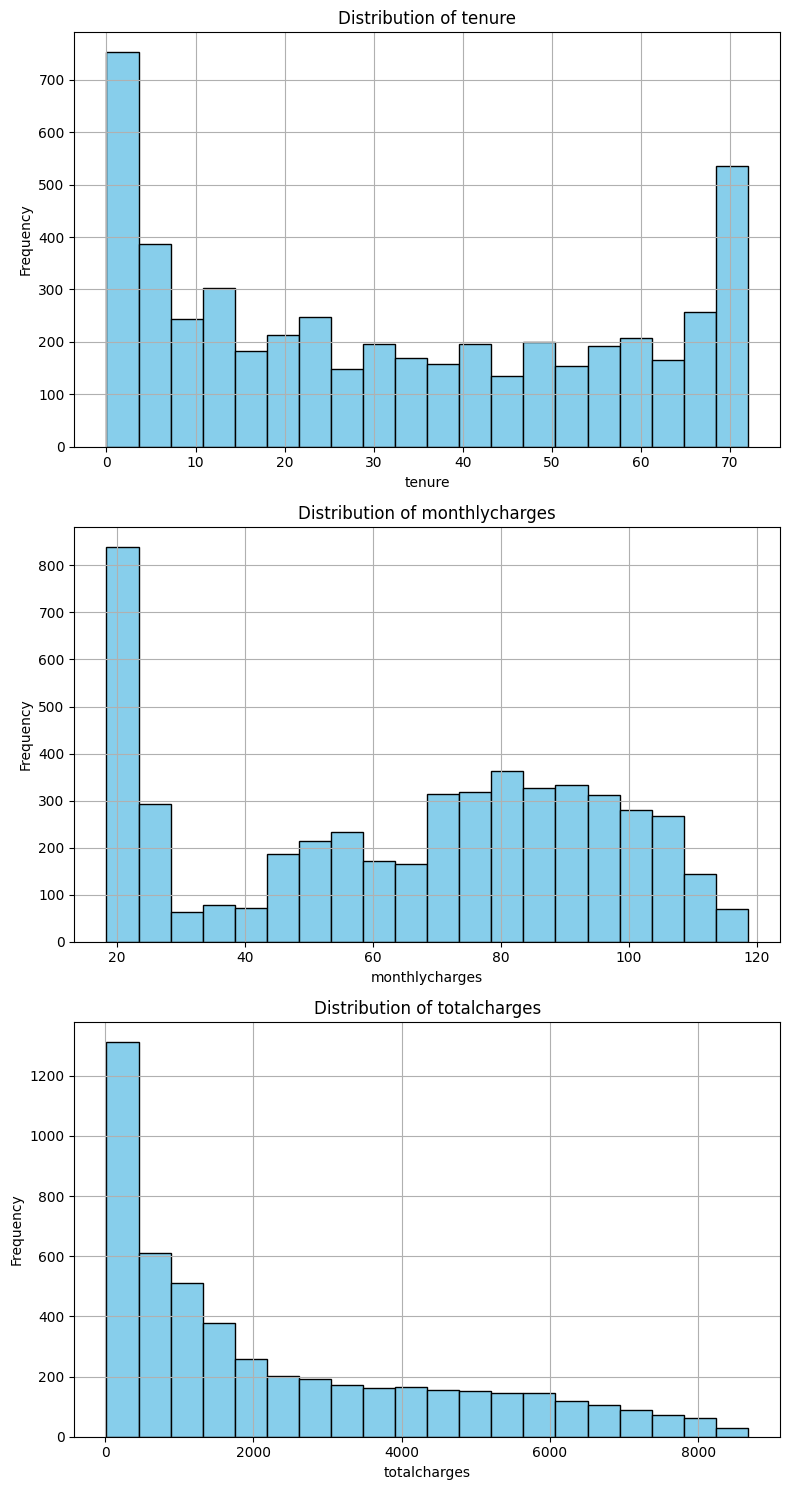

In [678]:
#List of numerical columns
numerical_columns = ['tenure', 'monthlycharges', 'totalcharges']

#Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 5*len(numerical_columns)))

#Loop through each numerical column and plot its histogram
for i, column in enumerate(numerical_columns):
    df[column].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

#Adjust layout
plt.tight_layout()
plt.show()

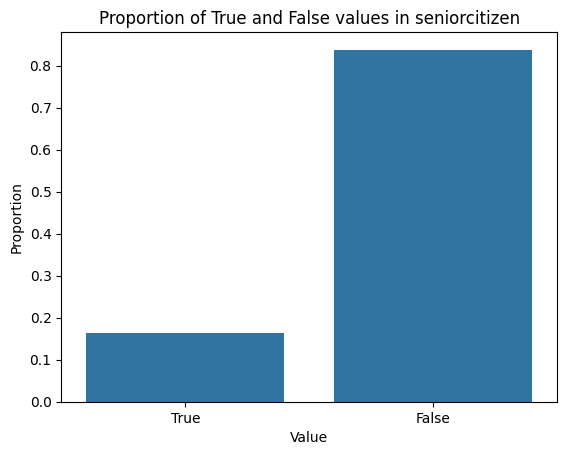

In [679]:
#Boolean variable to analyze
boolean_variable = 'seniorcitizen'

#Calculate the proportion of 'True' and 'False' values
proportion_true = df[boolean_variable].sum() / len(df)
proportion_false = 1 - proportion_true

#Plot the proportions
sns.barplot(x=['True', 'False'], y=[proportion_true, proportion_false])
plt.title(f'Proportion of True and False values in {boolean_variable}')
plt.xlabel('Value')
plt.ylabel('Proportion')
plt.show()

##### Check for Outliers

In [680]:
#Check summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
monthlycharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
totalcharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


##### Observation
1. The 'seniorcitizen', 'tenure' and 'monthlycharges' columns do not have any missing values but the 'totalcharges' column has missing values.
2. The average monthlycharge is approximately 65.09, the minimum monthlycharge is approximately 18.4 and the maximum monthlycharge is approximately 118.65. 
3. In the 'tenure' column, the standard deviation is approximately 24.53, indicating that the values are spread out over a wide range. 

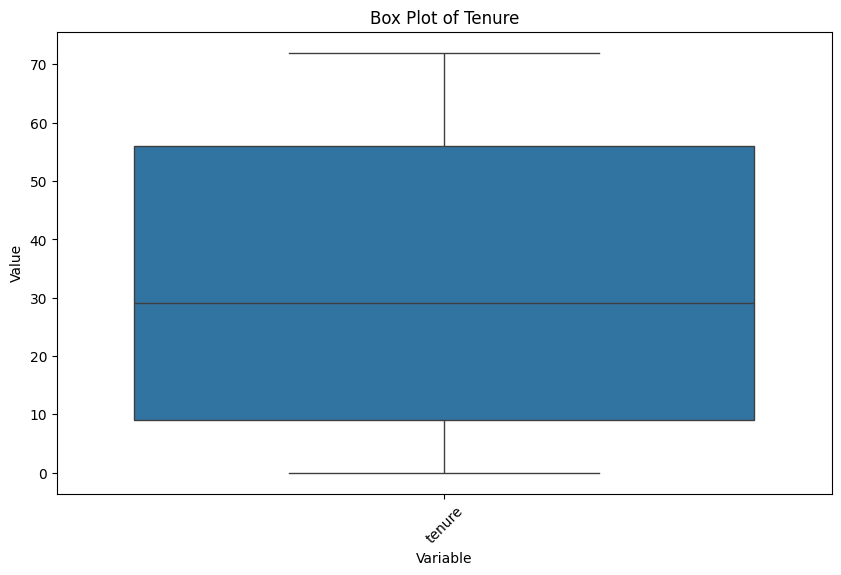

In [681]:
#Check 'tenure' 
numerical_column = ['tenure']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_column])
plt.title('Box Plot of Tenure')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

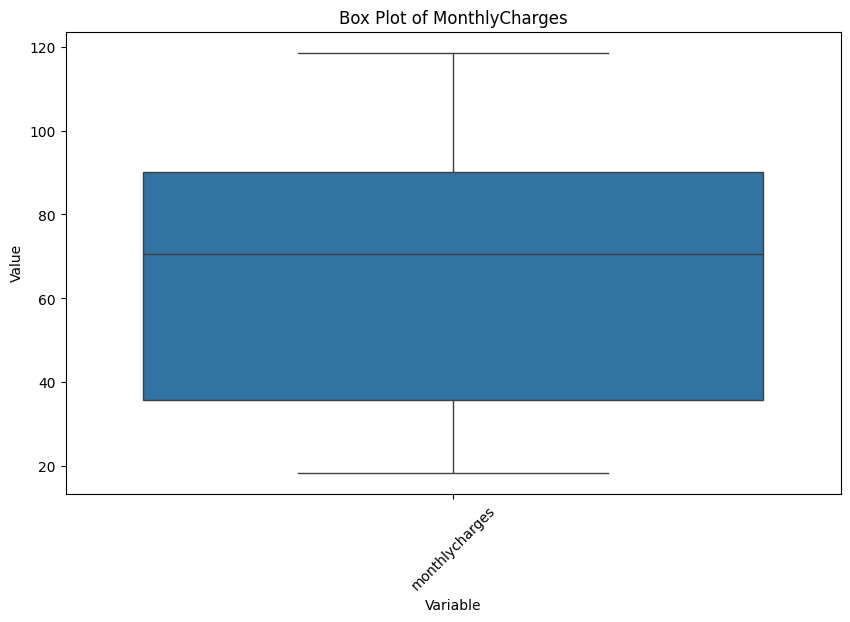

In [682]:
#Check 'monthlycharges' 
numerical_column = ['monthlycharges']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_column])
plt.title('Box Plot of MonthlyCharges')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

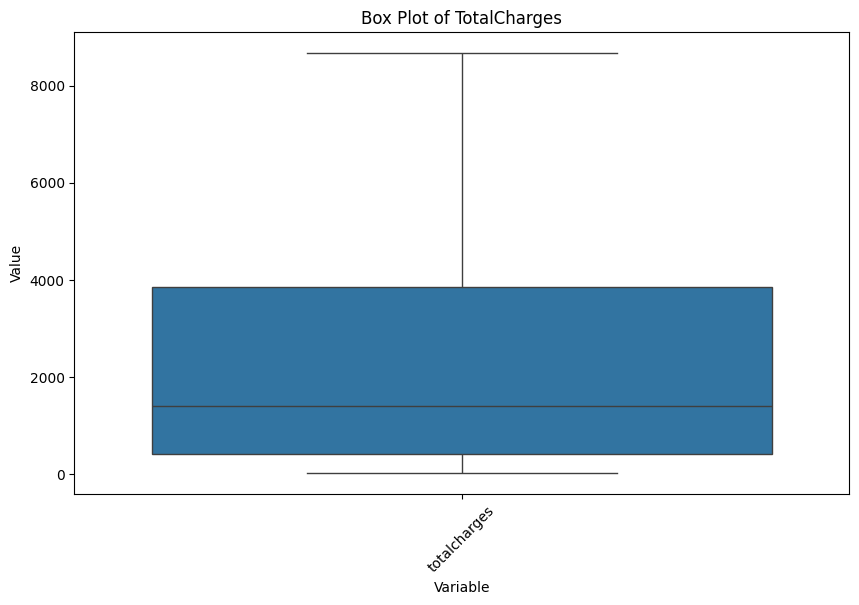

In [683]:
#Check 'totalcharges' 
numerical_column = ['totalcharges']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_column])
plt.title('Box Plot of TotalCharges')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

##### Observation
1. This shows all the columns do not have any outliers.
2. The 'tenure' boxplot suggests a fairly even distribution of tenure values across the dataset.
3. The 'monthlycharges' boxplot suggests that most customers have monthly charges clustered around the median, with a fairly consistent spread across the quartiles.
4. The 'totalcharges' values are concentrated between approximately 2000 and 4000, with the median closer to Q3, suggesting a skew towards higher charges.

##### Bivariate Analysis

##### Gender Vrs Churn Rate

In [684]:
#Get the count of churn for each gender
gender_churn_counts = df.groupby(['gender', 'churn']).size().unstack(fill_value=0)

print(gender_churn_counts)

churn     No  Yes
gender           
Female  1823  661
Male    1883  675


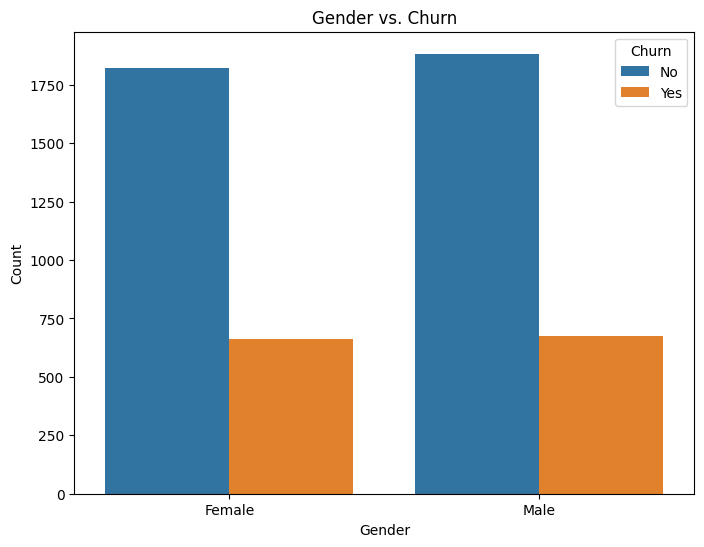

In [685]:
#Plot Gender vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

##### This implies that among females, 1823 customers did not churn, and 661 customers did churn. Similarly, among males, 1883 customers did not churn, and 675 customers did churn. 

##### Correlation of Numerical Variables

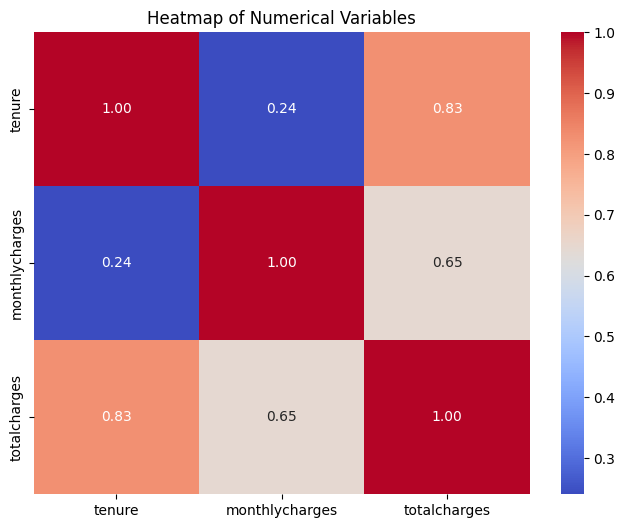

In [686]:
#Select the relevant columns
selected_columns = ['tenure', 'monthlycharges', 'totalcharges']
selected_corr_matrix = df[selected_columns].corr()

#Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Variables')
plt.show()

##### Observations
1. Tenure vs. Monthly Charges: There’s a weak positive correlation of (0.24), suggesting that as tenure increases, monthly charges tend to increase slightly.
2. Tenure vs. Total Charges: A strong positive correlation of (0.83) is observed here, indicating that longer tenure is strongly associated with higher total charges.
3. Monthly Charges vs. Total Charges: This pair shows a moderate positive correlation of (0.65), meaning as monthly charges increase, total charges also tend to increase.

##### Contract Vrs Churn

In [687]:
contract_churn_counts = df.groupby(['contract', 'churn']).size()
print(contract_churn_counts)

contract        churn
Month-to-month  No       1560
                Yes      1184
One year        No        933
                Yes       122
Two year        No       1213
                Yes        30
dtype: int64


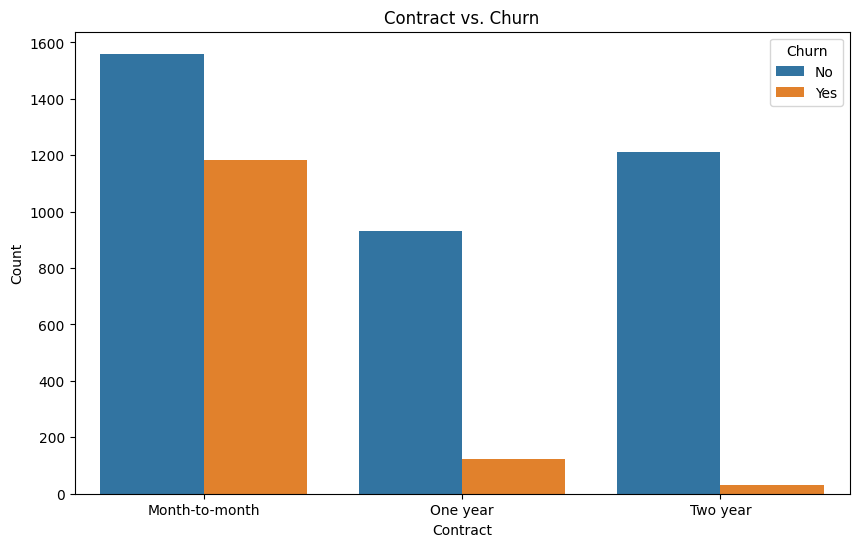

In [688]:
#Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='contract', hue='churn', data=df)
plt.title('Contract vs. Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


##### Observations
1. For customers with a 'Month-to-month' contract, there are 1560 customers who did not churn (No) and 1184 customers who did churn (Yes).
2. For customers with a 'One year' contract, there are 933 customers who did not churn and 122 customers who did churn.
3. For customers with a 'Two year' contract, there are 1213 customers who did not churn and 30 customers who did churn.
4. It can be concluded that customers with shorter-term contracts (like 'Month-to-month') tend to churn more compared to those with longer-term contracts.

##### Multivariate Analysis

##### The 'churn' column contains string values ('Yes' and 'No'), which cannot be converted to float for correlation calculation. To perform correlation analysis, we need to encode these categorical values into numerical values first. One common approach is to use label encoding, where 'Yes' is replaced with 1 and 'No' is replaced with 0.

In [689]:
#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Encode the 'churn' column
df['churn_encoded'] = label_encoder.fit_transform(df['churn'])

#Calculate correlation matrix
correlation_matrix = df[['tenure', 'monthlycharges', 'totalcharges', 'churn_encoded']].corr()

#Display correlation matrix
print(correlation_matrix)

                  tenure  monthlycharges  totalcharges  churn_encoded
tenure          1.000000        0.240645      0.826264      -0.348894
monthlycharges  0.240645        1.000000      0.647007       0.203117
totalcharges    0.826264        0.647007      1.000000      -0.192298
churn_encoded  -0.348894        0.203117     -0.192298       1.000000


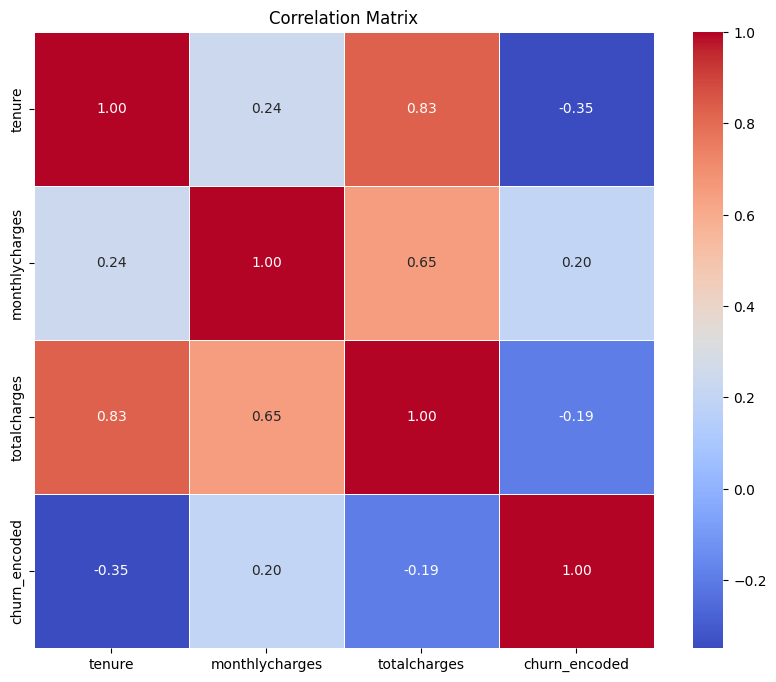

In [690]:
#Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Observations
1. tenure vs. monthlycharges: There is a positive correlation of approximately 0.24, indicating that as tenure increases, monthly charges also tend to increase, but the correlation is not very strong.
2. tenure vs. totalcharges: There is a strong positive correlation of approximately 0.83, suggesting that as tenure increases, total charges also increase.
3. tenure vs. churn_encoded: There is a negative correlation of approximately -0.35, indicating that as tenure increases, the likelihood of churn decreases.

#### HYPOTHESIS TESTING


##### Null Hypothesis: There is no relationship between the tenure and the churn of customers.
Alternate Hypothesis: There is a relationship between the tenure and the churn of customers.

In [691]:
#Create a contingency table
contingency_table = pd.crosstab(df['tenure'], df['churn'])

#Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#Set significance level
alpha = 0.05

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

#Compare p-value with alpha to make a decision
if p < alpha:
    print("Reject the null hypothesis: There is a relationship between tenure and churn.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between tenure and churn.")


Chi-square statistic: 774.1801118993867
P-value: 3.084245822214292e-118
Degrees of freedom: 72
Reject the null hypothesis: There is a relationship between tenure and churn.


##### Based on the p-value (which is far below the significance level of 0.05), we reject the null hypothesis. This means that there is sufficient evidence to conclude that there is a statistically significant relationship between tenure and churn.

#### ANSWERING THE ANALYTICAL QUESTIONS

1. What is the overall churn rate against retained customers?
2. Does churn rate differ based on the payment method?
3. What is the churn rate of customers based on their seniority?
4. What is the churn rate of customers based on their monthlycharges?
5. What is the churn rate of customers based on their contract type?
6. What is the churn rate of customers based on their gender?

##### Question One: What is the overall churn rate against retained customers?

In [692]:
#Count the number of customers who churned
churned_count = df['churn'].value_counts()['Yes']

#Calculate the total number of customers
total_customers = len(df)

#Calculate the overall churn rate
overall_churn_rate = (churned_count / total_customers) * 100

print("Overall churn rate:", overall_churn_rate)

Overall churn rate: 26.492167360697998


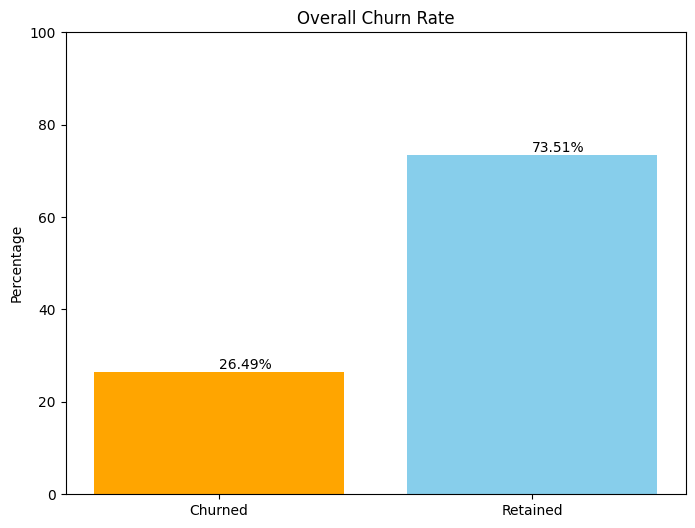

In [693]:
#Calculate the churn rates as percentages
churn_rate_percentage = (churned_count / total_customers) * 100
retention_rate_percentage = 100 - churn_rate_percentage

#Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Churned", "Retained"], [churn_rate_percentage, retention_rate_percentage], color=['orange', 'skyblue'])
plt.title("Overall Churn Rate")
plt.ylabel("Percentage")
plt.ylim(0, 100)

#Show the percentages on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", va='bottom')

plt.show()

##### This shows a bar plot with two bars: one for the churned customers and one for the retained customers. It shows there are more retained customers than customers that churned. 

##### Question Two: Does churn rate differ based on the payment method?

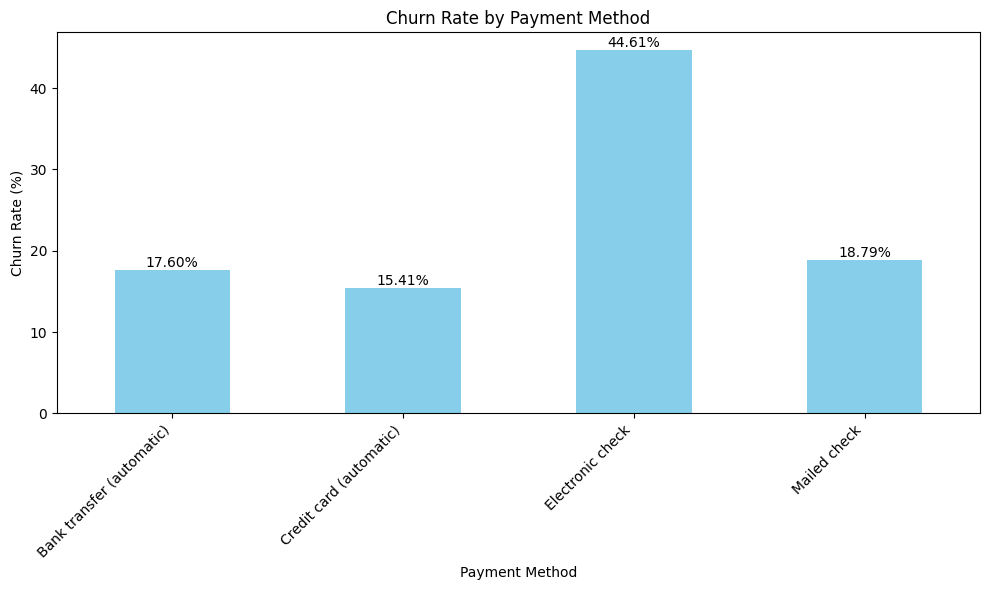

In [694]:
#Calculate churn rate for each payment method
payment_churn_rates = df.groupby('paymentmethod')['churn'].value_counts(normalize=True).loc[:, 'Yes'] * 100

# Plot churn rate based on payment method
plt.figure(figsize=(10, 6))
ax = payment_churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')

#Add labels on top of each bar
for i, rate in enumerate(payment_churn_rates):
    plt.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### This shows that customers using electronic check have the highest churn rate, which could suggest issues with this payment method. This might be as a result of user dissatisfaction hence requires further investigation and improvement of the payment process.

##### Question Three: What is the churn rate of customers based on their Seniority?

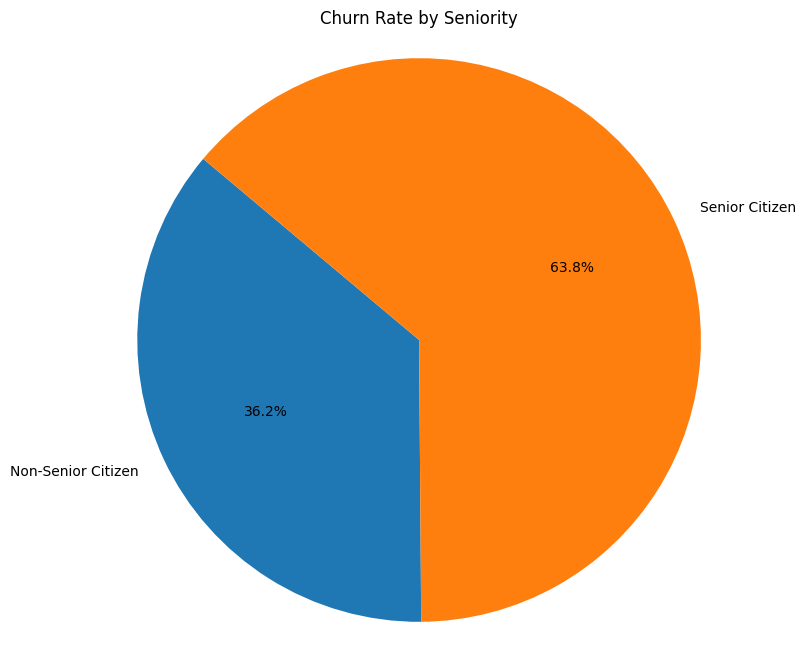

In [695]:
# Calculate churn rate based on seniority
seniority_churn_rate = df.groupby('seniorcitizen')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

# Plot churn rate based on seniority using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(seniority_churn_rate, labels=['Senior Citizen' if seniority == 1 else 'Non-Senior Citizen' for seniority in seniority_churn_rate.index], autopct='%1.1f%%', startangle=140)
plt.title('Churn Rate by Seniority')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


##### Question Four: What is the churn rate of customers based on their monthlycharges?

In [696]:
#Check unique values in the monthlycharges column
unique_monthlycharges = df['monthlycharges'].unique()

#Print unique values
print(unique_monthlycharges)

[ 29.85000038  56.95000076  53.84999847 ...  78.7         60.65
 103.2       ]


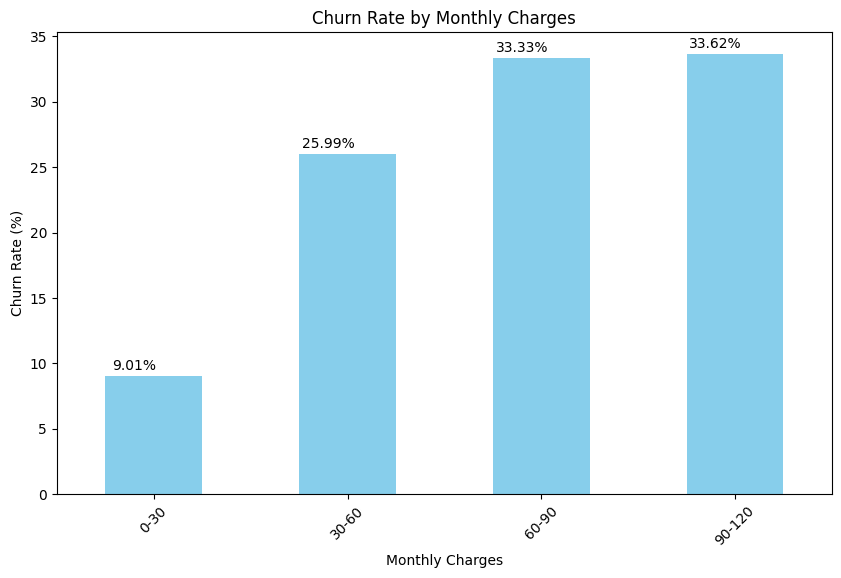

In [697]:
#Define bins for monthly charges
bins = [0, 30, 60, 90, 120]

#Create labels for the bins
labels = ['0-30', '30-60', '60-90', '90-120']

#Assign each monthly charge to a bin
df['monthly_charges_bin'] = pd.cut(df['monthlycharges'], bins=bins, labels=labels, right=False)

#Calculate churn rate based on monthly charges
monthly_charges_churn_rate = df.groupby('monthly_charges_bin')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

#Plot churn rate based on monthly charges using a bar plot
plt.figure(figsize=(10, 6))
bars = monthly_charges_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Add labels on the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center', color='black')

plt.show()

##### This illustrates the relationship between the amount customers are charged monthly and the rate at which they stop using the service (churn rate). 
0-30 Range: Represents the lowest monthly charges and corresponds to the lowest churn rate, suggesting customers are satisfied with the service or find it affordable.

30-60 Range: Shows a significant increase in churn rate, indicating a threshold where customers may begin to consider the service too expensive or not worth the cost.

60-90 & 90-120 Ranges: Both have the highest and constant churn rates, suggesting that beyond a certain price point, the churn rate stabilizes, possibly due to a segment of customers who are less price-sensitive.

##### Question Five: What is the churn rate of customers based on their contract type?

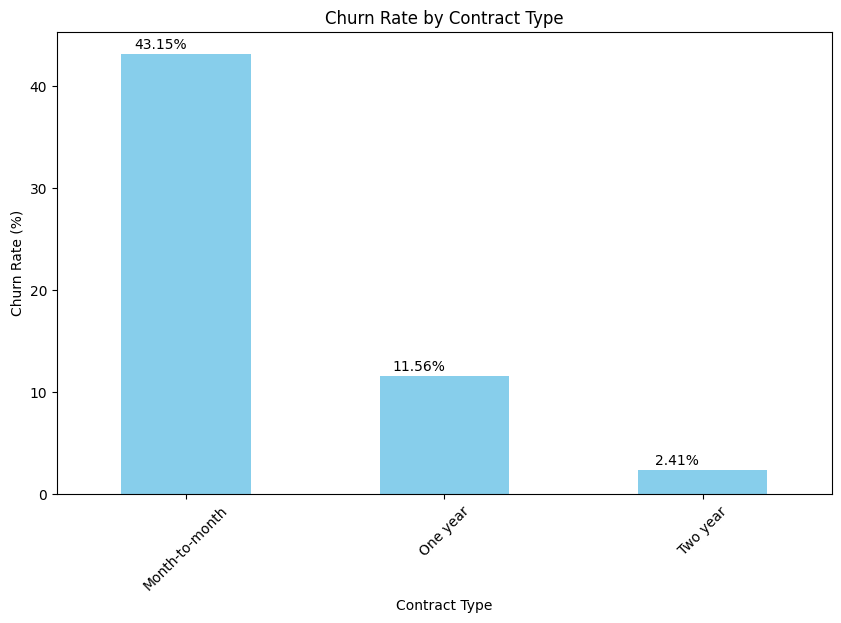

In [698]:
#Calculate churn rate based on contract type
contract_churn_rate = df.groupby('contract')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

#Plot churn rate based on contract type using a bar plot
plt.figure(figsize=(10, 6))
bars = contract_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

#Add labels on the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center', color='black')

plt.show()


##### This compares the churn rates across different contract durations. 
Month-to-Month: This category has the highest churn rate, around 40%, indicating that customers with no long-term commitments are more likely to discontinue the service.

One Year: Shows a significantly lower churn rate of about 12%, suggesting increased customer retention with longer contract terms.

Two Years: Has the lowest churn rate, which implies that the longest commitment contracts result in the best customer retention.

##### Question Six: What is the churn rate of customers based on their gender?

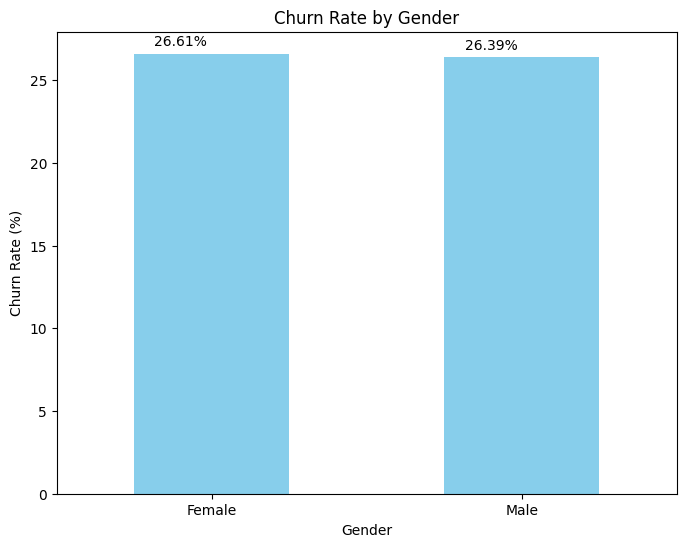

In [699]:
#Calculate churn rate based on gender
gender_churn_rate = df.groupby('gender')['churn'].value_counts(normalize=True)[:, 'Yes'] * 100

#Plot churn rate based on gender using a bar plot
plt.figure(figsize=(8, 6))
bars = gender_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)

#Add labels on the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{bar.get_height():.2f}%', ha='center', color='black')

plt.show()

##### The churn rates are nearly identical for both genders, suggesting that gender does not play a significant role in the likelihood of customers discontinuing the service.

In [700]:
#Converting merged dataset to csv
df.to_csv('merged_dataset.csv', index=False)

#### DATA PREPARATION

##### Check if dataset is balanced

In [701]:
#Check dataframe
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_encoded,monthly_charges_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,0,0-30
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.950001,1889.500000,No,0,30-60
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,1,30-60
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,0,30-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,1,60-90


In [702]:
#Drop the 'customerid', 'churn_encoded' and 'monthly_charges_bin' columns
df = df.drop(['customerid', 'churn_encoded', 'monthly_charges_bin'], axis=1)

In [703]:
#Check dataframe
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [704]:
#Check for missing values in the churn column
missing_values = df['churn'].isnull().sum()

if missing_values == 0:
    print("There are no missing values in the churn column.")
else:
    print(f"There is {missing_values} missing value in the churn column.")

There is 1 missing value in the churn column.


In [705]:
#Drop rows with missing values in the churn column
df.dropna(subset=['churn'], inplace=True)

In [706]:
#Check to confirm the missing values in the churn column
missing_values = df['churn'].isnull().sum()

if missing_values == 0:
    print("There are no missing values in the churn column.")
else:
    print(f"There are {missing_values} missing values in the churn column.")

There are no missing values in the churn column.


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5042 non-null   object 
 1   seniorcitizen     5042 non-null   int64  
 2   partner           5042 non-null   object 
 3   dependents        5042 non-null   object 
 4   tenure            5042 non-null   int64  
 5   phoneservice      5042 non-null   object 
 6   multiplelines     4773 non-null   object 
 7   internetservice   5042 non-null   object 
 8   onlinesecurity    4391 non-null   object 
 9   onlinebackup      4391 non-null   object 
 10  deviceprotection  4391 non-null   object 
 11  techsupport       4391 non-null   object 
 12  streamingtv       4391 non-null   object 
 13  streamingmovies   4391 non-null   object 
 14  contract          5042 non-null   object 
 15  paperlessbilling  5042 non-null   object 
 16  paymentmethod     5042 non-null   object 
 17  

In [708]:
#Change the data type of the seniorcitizen column to object
df['seniorcitizen'] = df['seniorcitizen'].astype(str)

##### To check if the dataset is balanced, we set a threshold of 5%. If the absolute difference between the counts of the two classes is less than the threshold, then the dataset is considered balanced; otherwise, it's considered imbalanced.

In [709]:
#The target variable is 'churn' and it binary are (Yes/No)
#Count the occurrences of each class
class_counts = df['churn'].value_counts()

#Set the threshold for imbalance(5% of the total number of rows)
threshold = len(df) * 0.05 

#Check if the dataset is balanced
is_balanced = abs(class_counts[0] - class_counts[1]) < threshold  

if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")

The dataset is imbalanced.


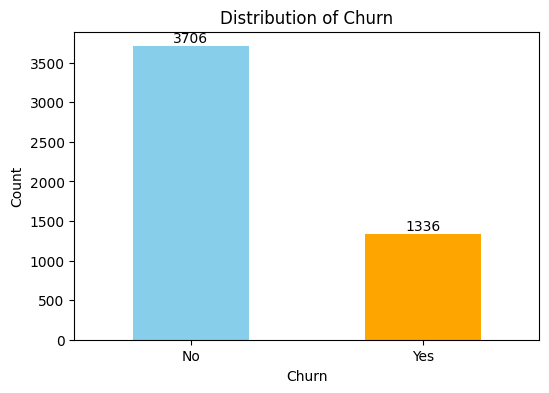

In [710]:
#Count the occurrences of each class
class_counts = df['churn'].value_counts()

#Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
bars = class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)

#Annotate the bars with churn counts
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

##### The visual also confirms the dataset is not balanced since it has more 'No' values than 'Yes' values.

In [711]:
#Check Dataframe
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [712]:
#Check the totalcharges column
df[df['totalcharges']== '']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [713]:
empty_totalcharges = df[df['totalcharges'].isna()]
empty_totalcharges

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
1670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
1754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


In [714]:
#Replace the NaN values with 0
df['totalcharges'].fillna(0, inplace=True)

In [715]:
empty_totalcharges = df[df['totalcharges'].isna()]
empty_totalcharges

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


##### TRAINING THE IMBALANCED DATASET

##### Split the Dataset into Training and Evaluation Set

##### In splitting the data, it is done such that;
X contains all the features except the target variable (churn).

y contains only the target variable (churn).

We use train_test_split to split the data into training and evaluation sets and set test_size to 0.3 which specifies that 30% of the data should be used for evaluation, while the rest is used for training. 

X_train and y_train contain the training features and target variable respectively.X_eval and y_eval contain the evaluation features and target variable respectively.


In [716]:
#Define features (X) and target variable (y)
X = df.drop('churn', axis=1) 
y = df['churn']  

#Split the dataset into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [717]:
#Instantiate encoder
encoder = LabelEncoder()

#Encode y_train
y_train_encoded = encoder.fit_transform(y_train)

#Encode y_test
y_eval_encoded = encoder.transform(y_eval)

In [718]:
#Get categorical columns
categorical_columns = X.select_dtypes('object').columns

#Get numerical columns
numerical_columns = X.select_dtypes('number').columns

In [719]:
#Prepare numerical pipeline
numerical_pipeline=Pipeline(steps=[
('numerical_imputer',SimpleImputer(strategy='median')),
('scaler', StandardScaler())
    
])

#Prepare categorical pipeline
categorical_pipeline=Pipeline(steps=[
    ('categorical_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())

])

#Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline,numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

#### MODELLING AND EVALUATION

In [720]:
#Define the models
model = [
    ('K-Nearest_Neighbors', KNeighborsClassifier(n_neighbors=5)),  
    ('Logistic_Regression', LogisticRegression(random_state=42)),  
    ('Support_Vector_Machine', SVC(random_state=42)),  
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),  
    ('Random_Forest', RandomForestClassifier(random_state=42)),  
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),  
]

all_pipelines = {}

#Create a DataFrame for the metrics
metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

#Train and evaluate each model
for model_name, classifier in model:
    
    #Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])
    
    #Fit data to pipeline
    pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model_name] = pipeline

    #Make predictions on the test set
    y_pred = pipeline.predict(X_eval)

    #Generate classification report for each model
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    #Evaluate the model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score= metrics['weighted avg']['f1-score']

    #Add metrics to metrics_output
    metrics_output.loc[len(metrics_output)] = [model_name, accuracy, precision, recall, f1_score]

In [721]:
#Display the metrics_output
metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
2,Support_Vector_Machine,0.791143,0.780884,0.791143,0.783662
5,Gradient_Boosting,0.787178,0.777928,0.787178,0.780926
1,Logistic_Regression,0.781229,0.775566,0.781229,0.777933
4,Random_Forest,0.781229,0.771451,0.781229,0.774688
0,K-Nearest_Neighbors,0.768672,0.766503,0.768672,0.767535
3,Decision_Tree,0.721745,0.731100,0.721745,0.725898


* Logistic Regression and Gradient Boosting have the highest accuracy, precision, recall, and F1 score among the models listed.

* Support Vector Machine (SVM) has lower precision compared to other models, indicating a higher number of false positives.

* K-Nearest Neighbors performs reasonably well, with accuracy, precision, recall, and F1 score in the mid-range among the models evaluated. It's not the top-performing model in terms of accuracy, but its precision, recall, and F1 score are competitive with other models like Decision Tree and Random Forest.

* Decision Tree and Random Forest have slightly lower accuracy compared to Logistic Regression and Gradient Boosting, but their precision, recall, and F1 score are comparable.

##### BALANCING THE UNBALANCED DATASET

In [722]:
from imblearn.pipeline import Pipeline as imbpipeline
#Define the models
model = [
    ('K-Nearest_Neighbors', KNeighborsClassifier(n_neighbors=5)),  
    ('Logistic_Regression', LogisticRegression(random_state=42)),  
    ('Support_Vector_Machine', SVC(random_state=42)),  
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),  
    ('Random_Forest', RandomForestClassifier(random_state=42)),  
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),  
]

all_balanced_pipelines = {}

# All confusion matrix
all_confusion_matrix =  {}

#Create a DataFrame for the metrics
balanced_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

#Train and evaluate each model
for model_name, classifier in model:
    
    #Create pipeline
    balanced_pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, k_neighbors=15, sampling_strategy='auto')),
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])
    
    #Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)
    all_balanced_pipelines[model_name] = balanced_pipeline

    #Make predictions on the test set
    y_pred = balanced_pipeline.predict(X_eval)

    # Generate confusion matrix
    confusion_matrix_imb = confusion_matrix(y_eval_encoded, y_pred)

    all_confusion_matrix[model_name] = confusion_matrix_imb

    #Generate classification report for each model
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    #Evaluate the model
    balanced_accuracy = balanced_metrics['accuracy']
    balanced_precision = balanced_metrics['weighted avg']['precision']
    balanced_recall = balanced_metrics['weighted avg']['recall']
    balanced_f1_score= balanced_metrics['weighted avg']['f1-score']

    #Add metrics to metrics_output
    balanced_metrics_output.loc[len(balanced_metrics_output)] = [model_name, balanced_accuracy, balanced_precision, balanced_recall, balanced_f1_score]

In [723]:
#Display the metrics_output
balanced_metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
5,Gradient_Boosting,0.775281,0.781350,0.775281,0.777952
2,Support_Vector_Machine,0.765367,0.798842,0.765367,0.775148
4,Random_Forest,0.773298,0.768333,0.773298,0.770505
1,Logistic_Regression,0.742895,0.800749,0.742895,0.756483
3,Decision_Tree,0.709848,0.728417,0.709848,0.717354
0,K-Nearest_Neighbors,0.678123,0.761109,0.678123,0.696664


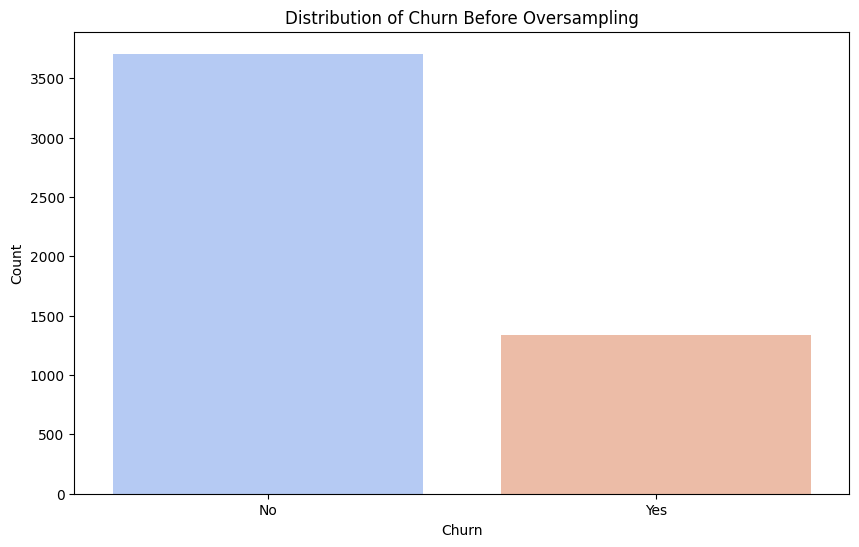

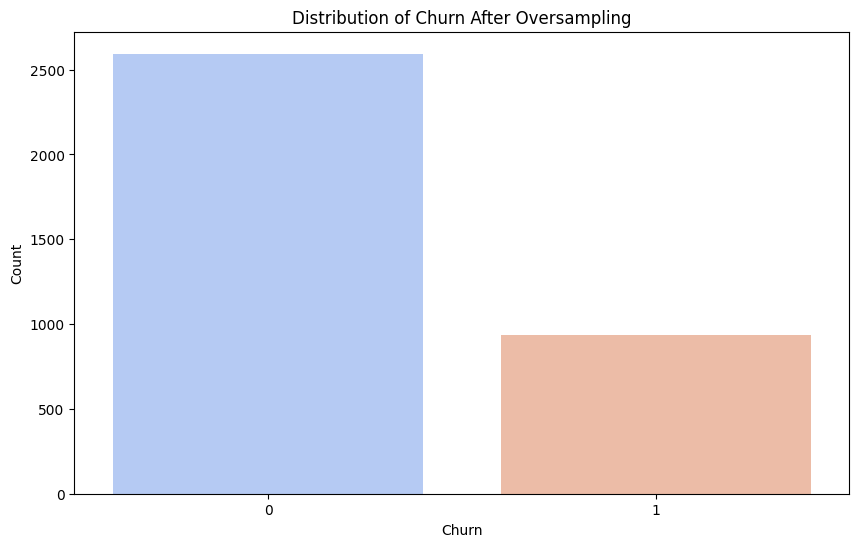

In [724]:
#Plot the distribution of the target variable before and after oversampling
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title('Distribution of Churn Before Oversampling')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_encoded, palette='coolwarm')
plt.title('Distribution of Churn After Oversampling')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


##### Modelling the Balanced Dataset

##### This is the reults of the performance of the models after balancing the dataset.
* Gradient Boosting has the highest accuracy, precision, recall, and F1 score among the models listed, followed closely by Logistic Regression and Random Forest.

* Support Vector Machine and K-Nearest Neighbors have relatively lower accuracy, precision, recall, and F1 score compared to other models, indicating lower performance.

* Decision Tree has slightly better performance than Support Vector Machine and K-Nearest Neighbors but is still outperformed by Gradient Boosting, Logistic Regression, and Random Forest.

##### Applying feature selection to improve performance of the models

* Gradient Boosting still has the highest accuracy, precision, recall, and F1 score among the models listed, followed closely by Logistic Regression and Random Forest.

* Support Vector Machine and K-Nearest Neighbors still have relatively lower accuracy, precision, recall, and F1 score compared to other models, indicating lower performance.

* Decision Tree has slightly better performance than Support Vector Machine and K-Nearest Neighbors but is still outperformed by Gradient Boosting, Logistic Regression, and Random Forest.

* Overall, the interpretation remains similar to the previous results, indicating that feature selection did not significantly alter the model performance rankings.

##### Adding confusion matrix to the model

In [726]:
# Iterate over the keys (model names) in the all_confusion_matrix dictionary
for model_name, confusion_matrix in all_confusion_matrix.items():
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix)

Confusion Matrix for K-Nearest_Neighbors:
[[726 386]
 [101 300]]
Confusion Matrix for Logistic_Regression:
[[807 305]
 [ 84 317]]
Confusion Matrix for Support_Vector_Machine:
[[862 250]
 [105 296]]
Confusion Matrix for Decision_Tree:
[[854 258]
 [181 220]]
Confusion Matrix for Random_Forest:
[[955 157]
 [186 215]]
Confusion Matrix for Gradient_Boosting:
[[926 186]
 [154 247]]


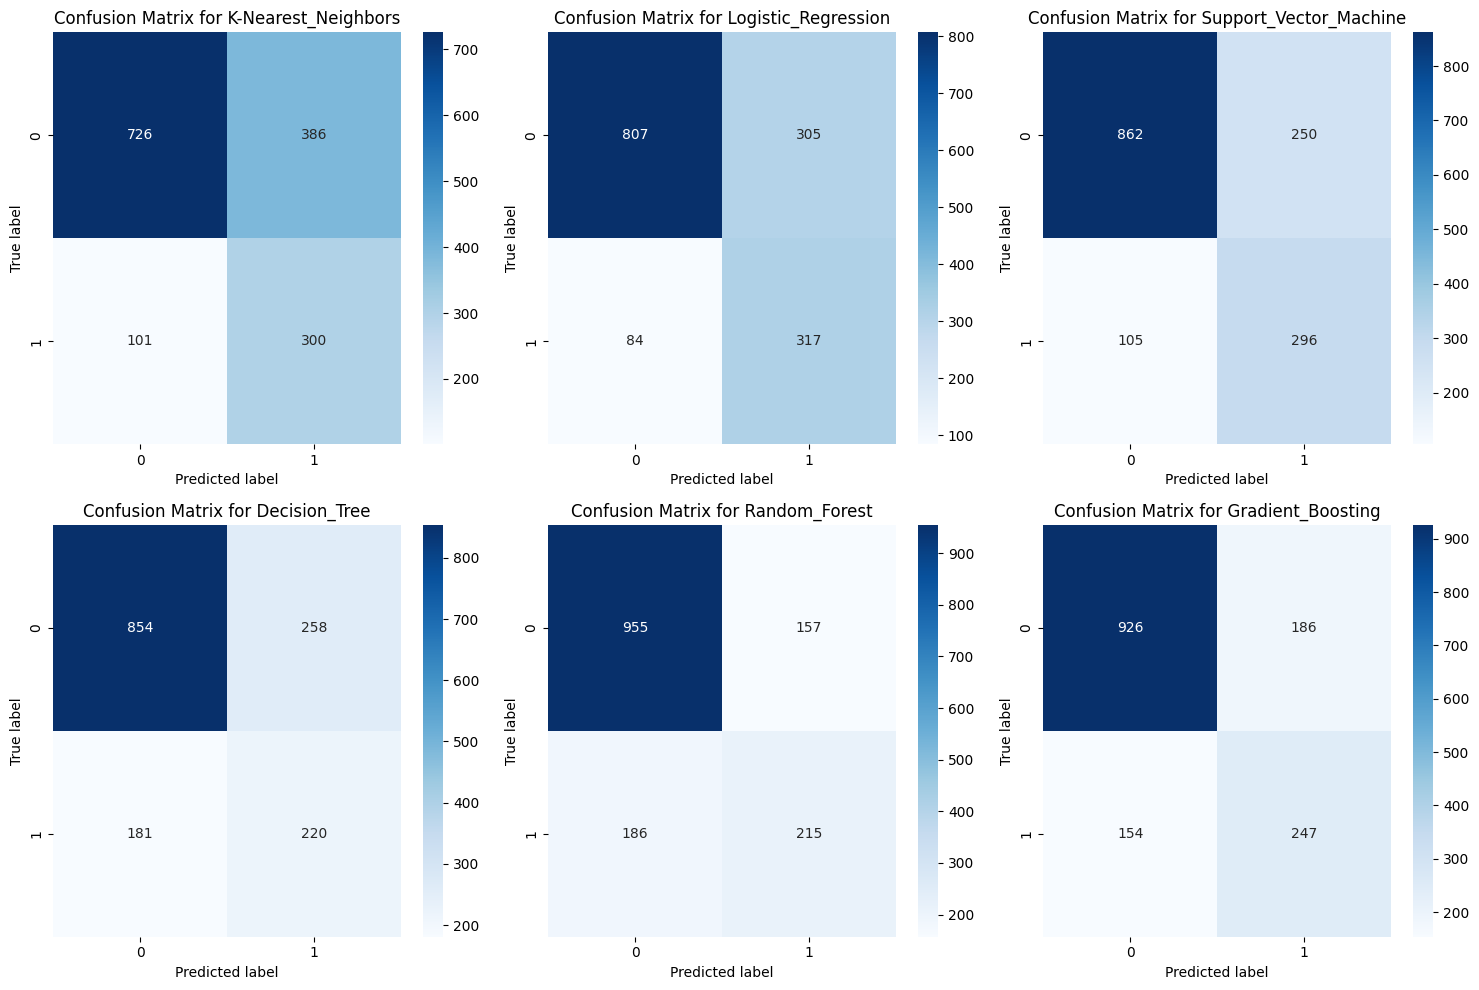

In [727]:
# Plot confusion matrices using heatmaps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (model, confusion_matrix_imb) in enumerate(all_confusion_matrix.items()):
    ax = axes[i // 3, i % 3]
    sns.heatmap(confusion_matrix_imb, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix for {model}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


* The best performing models are typically those with high TP and TN rates and low FP and FN rates. For the purpose of this project, we will use the same metrics in selecting the best model. 
* Looking at this confusion matrice, based on the TP and TN rates, the best performing models are Random Forest and Gradient Boosting as they have the highest TP and TN rates among the models. 
* For FP and FN rates, the lower the values, the better the model. Hence, the models with the lowest FP and FN rates are also Random Forest and Gradient Boosting. They achieve a good balance between correctly identifying positive cases (churn) and correctly identifying negative cases (non-churn).
* Therefore, Random Forest and Gradient Boosting can be considered the best performing models based on both TP and TN rates, as well as FP and FN rates.

##### Visualize Evaluation Using ROC-AUC

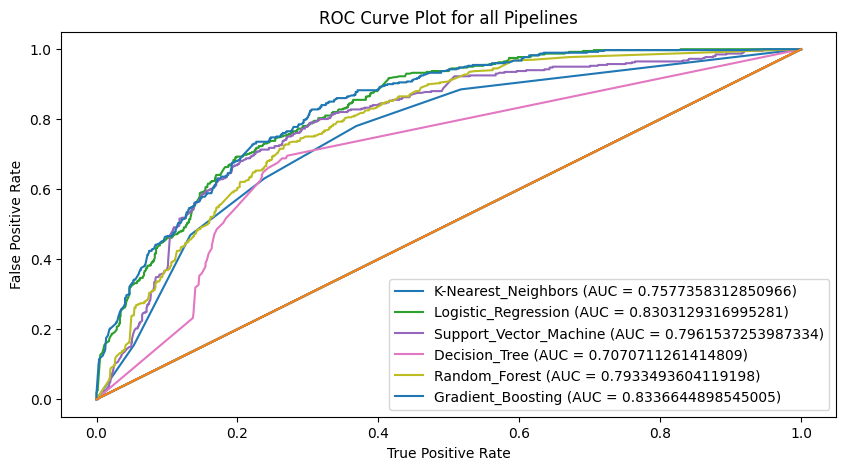

In [733]:

from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the models
model = [
    ('K-Nearest_Neighbors', KNeighborsClassifier(n_neighbors=5)),  
    ('Logistic_Regression', LogisticRegression(random_state=42)),  
    ('Support_Vector_Machine', SVC(random_state=42, probability=True)),  # Set probability=True
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),  
    ('Random_Forest', RandomForestClassifier(random_state=42)),  
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),  
]

all_balanced_pipelines = {}

# Create a DataFrame for the metrics
balanced_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Train and evaluate each model
for model_name, classifier in model:
    
    # Create pipeline with feature selection
    balanced_pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Selecting top 10 features based on ANOVA F-value
        ('smote', SMOTE(random_state=42, k_neighbors=15, sampling_strategy='auto')),
        ('classifier', classifier)
    ])
    
    # Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Make predictions on the test set
    y_pred = balanced_pipeline.predict(X_eval)

    # Generate classification report for each model
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Evaluate the model
    balanced_accuracy = balanced_metrics['accuracy']
    balanced_precision = balanced_metrics['weighted avg']['precision']
    balanced_recall = balanced_metrics['weighted avg']['recall']
    balanced_f1_score= balanced_metrics['weighted avg']['f1-score']

    # Add metrics to metrics_output
    balanced_metrics_output.loc[len(balanced_metrics_output)] = [model_name, balanced_accuracy, balanced_precision, balanced_recall, balanced_f1_score]

# Plot roc_curves
fig, ax = plt.subplots(figsize=(10, 5))
all_roc_data = {}

for model_name, balanced_pipeline in all_balanced_pipelines.items():

    y_score = balanced_pipeline.predict_proba(X_eval)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)
    
    roc_auc = auc(fpr,tpr)

    roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})

    all_roc_data[model_name] = roc_data

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc})')

    ax.plot([0,1], [0,1])

    ax.set_ylabel('False Positive Rate')
    
    ax.set_xlabel('True Positive Rate')


ax.set_title('ROC Curve Plot for all Pipelines')
plt.legend()
plt.show()

* Based on the provided AUC (Area Under the ROC Curve) values, the best performing models are;
1. Gradient Boosting
2. Logistic Regression
3. Support Vector Machine
* These models have higher AUC values, indicating better overall performance in terms of the trade-off between true positive rate and false positive rate.
* We will select Gradient Boosting and Logistic Regression as the best performing models, and perform threshold optimization on these tow models as well as hyperparameter tuning.

##### Threshold Optimization

In [734]:
# Preview of the threshold for Logistic Regression
all_roc_data['Logistic_Regression'].loc[340:,]

,False Positive Rate,True Positive Rate,Threshold
340,0.414568,0.915212,0.329298
341,0.414568,0.917706,0.327482
342,0.417266,0.917706,0.324688
343,0.422662,0.920200,0.323717
344,0.425360,0.920200,0.319000
...,...,...,...
523,0.973921,1.000000,0.017703
524,0.976619,1.000000,0.017267
525,0.980216,1.000000,0.016842
526,0.987410,1.000000,0.016427


In [735]:
# Preview of the threshold for Gradient Boosting
all_roc_data['Gradient_Boosting'].loc[340:,]

,False Positive Rate,True Positive Rate,Threshold
340,0.457734,0.920200,0.188999
341,0.458633,0.920200,0.188954
342,0.458633,0.922693,0.188941
343,0.460432,0.922693,0.188251
344,0.460432,0.925187,0.188195
...,...,...,...
485,0.955935,1.000000,0.014746
486,0.957734,1.000000,0.014672
487,0.958633,1.000000,0.013899
488,0.980216,1.000000,0.013692


In [736]:
#Preview the Gradient Boosting pipeline
GradientBoostingClassifier_pipeline = all_balanced_pipelines['Gradient_Boosting']
GradientBoostingClassifier_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequ...
                                                  Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(k_neighbors=15, random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [737]:
from sklearn.metrics import confusion_matrix
# Best threshold
gradient_threshold = 0.25

# Predict probabilities
y_pred_proba = GradientBoostingClassifier_pipeline.predict_proba(X_eval)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba > gradient_threshold).astype(int)

# Compute confusion matrix
gradient_threshold_matrix = confusion_matrix(y_eval_encoded, predictions)

# Saving the best model and threshold in variables
best_gradient_boosting_model = GradientBoostingClassifier_pipeline
best_gradient_threshold = gradient_threshold

# Print the confusion matrix
print(gradient_threshold_matrix)


[[700 412]
 [ 48 353]]


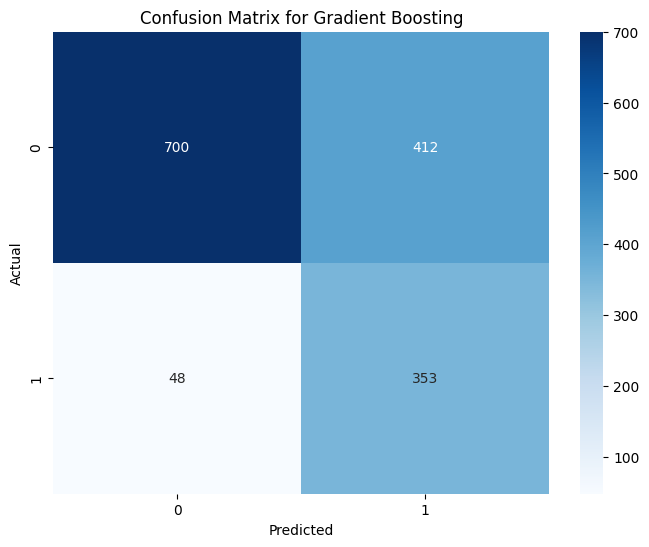

In [738]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gradient_threshold_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [739]:
#Preview the logistic regression pipeline
LogisticRegression_pipeline = all_balanced_pipelines['Logistic_Regression']
LogisticRegression_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequ...
                                                  Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(k_neighbors=15, random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [740]:
# Best threshold
LR_threshold = 0.22

# Predict probabilities
y_pred_proba = LogisticRegression_pipeline.predict_proba(X_eval)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba > LR_threshold).astype(int)

# Compute confusion matrix
LR_threshold_matrix = confusion_matrix(y_eval_encoded, predictions)

# Saving the best model and threshold in variables
best_logistic_regression_model = LogisticRegression_pipeline
best_LR_threshold = LR_threshold
LR_threshold_matrix

array([[517, 595],
       [ 19, 382]], dtype=int64)

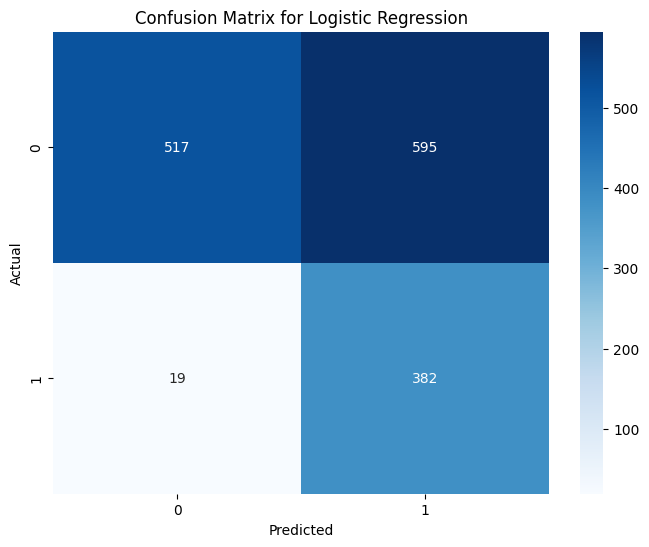

In [741]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(LR_threshold_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### HYPERPARAMETER TUNING TO IMPROVE MODEL PERFORMANCE
* We will perform hyperparameter tuning on the two best performing models to improve their performance thus Gradient Boosting and Logistic Regression.

##### Hyper tuning Gradient Boosting Model.

#Load the saved GradientBoostingClassifier pipeline
current_params = best_gradient_boosting_model.get_params()
current_params

#Define parameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__min_samples_split': [2, 3, 5, 8, 10],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 8],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion': ['friedman_mse', 'squared_error'],
    'classifier__min_impurity_decrease': [0.0, 0.1, 0.2],
    'classifier__ccp_alpha': [0.0, 0.1, 0.2],
    'preprocessor__numerical_pipeline__numerical_imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical_pipeline__categorical_imputer__strategy': ['most_frequent', 'constant'],
    'preprocessor__categorical_pipeline__encoder__handle_unknown': ['error', 'ignore']
}

#Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=best_gradient_boosting_model, param_distributions=param_grid, scoring='accuracy',
                                      cv=5, n_jobs=-1, n_iter=150, random_state=42, verbose=2)

#Fit the randomized search on the train data
random_search_gb.fit(X_train_selected_df, y_train_resampled)

#Best parameters
best_params = random_search_gb.best_params_

#Mean accuracy score of the best estimator
best_score = random_search_gb.best_score_
best_params, best_score

In [ ]:
#Display the best score
best_score

0.8436991246797213

##### Evaluating the performance of the tuned model compared to the original model.

from sklearn.metrics import f1_score
#Fit tuned model on train data
tuned_gb_model = random_search_gb.best_estimator_
tuned_gb_model.fit(X_train_selected_df, y_train_resampled)

#Make predictions
random_search_gb_pred = tuned_gb_model.predict(X_eval_selected_df)
original_gb_pred = best_gradient_boosting_model.predict(X_eval_selected_df)

#Evaluate performance
random_search_gb_accuracy = accuracy_score(y_eval, random_search_gb_pred)
original_gb_accuracy = accuracy_score(y_eval, original_gb_pred)

random_search_gb_precision = precision_score(y_eval, random_search_gb_pred)
original_gb_precision = precision_score(y_eval, original_gb_pred)

random_search_gb_recall = recall_score(y_eval, random_search_gb_pred)
original_gb_recall = recall_score(y_eval, original_gb_pred)

random_search_gb_f1 = f1_score(y_eval, random_search_gb_pred)
original_gb_f1 = f1_score(y_eval, original_gb_pred)

#Print comparison
print("Randomized Search Tuned Model:")
print(f"Accuracy: {random_search_gb_accuracy:.4f}")
print(f"Precision: {random_search_gb_precision:.4f}")
print(f"Recall: {random_search_gb_recall:.4f}")
print(f"F1-score: {random_search_gb_f1:.4f}")
print("\nOriginal Model:")
print(f"Accuracy: {original_gb_accuracy:.4f}")
print(f"Precision: {original_gb_precision:.4f}")
print(f"Recall: {original_gb_recall:.4f}")
print(f"F1-score: {original_gb_f1:.4f}")

##### Based on this output, the original model has a higher accuracy, precision, recall, and F1-score compared to the tuned model but it's essential to consider the trade-offs between these metrics based on the specific objectives of the Business. The original model performs better in capturing actual positive instances but might have lower precision. On the other hand, the tuned model achieves a better balance between precision and recall, which is preferable for the Business objective.

##### Use the tuned Gradient Boosting model to make predictions on the Evaluation set

In [ ]:
gradient_threshold = 0.25

#Make predictions on the test set
y_pred_proba = tuned_gb_model.predict_proba(X_eval_selected_df)[:, 1]

#Apply the specified threshold to convert probabilities to binary predictions
predictions_GB = (y_pred_proba > best_gradient_threshold).astype(int)

#Compute the confusion matrix
threshold_matrix = confusion_matrix(y_eval, predictions_GB)
print(threshold_matrix)

[[893 219]
 [147 254]]


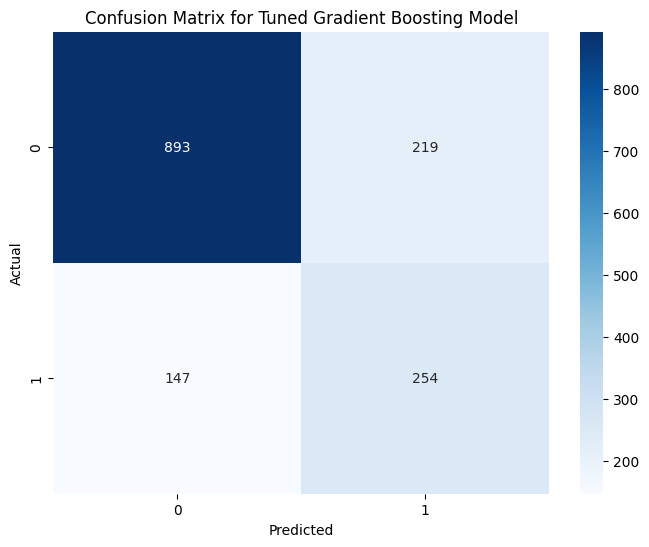

In [ ]:
#Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(threshold_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned Gradient Boosting Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Hyperparameter tuning the Logistic Regression Model

current_params = best_logistic_regression_model.get_params()
current_params

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize GridSearchCV
grid_search_LR = GridSearchCV(best_logistic_regression_model, param_grid, cv=5, verbose=1, n_jobs=-1)

# The training set
grid_search_LR.fit(X_train_selected_df, y_train_resampled)

# Print the best parameters
print("Best Parameters: ", grid_search_LR.best_params_)

In [ ]:
#Best score
grid_search_LR.best_score_

0.8223021796608343

In [ ]:
best_model_LR = grid_search_LR.best_estimator_

# Make predictions on the test set
y_pred_proba = best_model_LR.predict_proba(X_eval_selected_df)[:, 1]

# Apply the specified threshold to convert probabilities to binary predictions
predictions = (y_pred_proba > LR_threshold).astype(int)

# Compute the confusion matrix
threshold_matrix_LR = confusion_matrix(y_eval, predictions)
print(threshold_matrix_LR)

[[683 429]
 [ 49 352]]


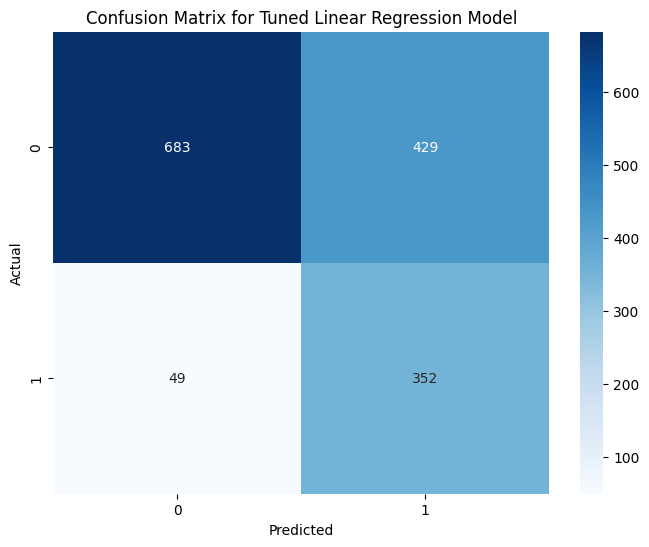

In [ ]:
#Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(threshold_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned Linear Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### BUSINESS IMPACT ASSESSMENT
##### Business Objective
The main objective of the business is to create a predictive model that improves true positives and reduces the occurrence of false negatives. Specifically, in the case of customer churn prediction, a false negative arises when the model inaccurately forecasts that a customer will not churn, whereas they indeed do. This error could lead to missed chances to take action and retain valuable customers.
##### Optimal Model Selection
Due to the paramount importance of reducing false negatives, the ideal choice for best model is the model that shows the fewest occurrences of false negatives. In our assessment, the Logistic Regression model has proven to excel in this aspect. The decrease in false negatives indicates an enhanced ability to recognize customers prone to churn, aligning closely with our key business objectives.
##### Conclusion
In conclusion, the Logistic Regression model emerges as the top choice for our churn prediction task, emphasizing the minimization of false negatives. Adopting this model empowers businesses to preemptively pinpoint and retain customers prone to churning, ultimately bolstering customer retention rates, optimizing revenue, and securing enduring business viability.

##### Testing the Model on the Test Data

In [ ]:
#Load the test data
test_data = pd.read_csv("Dataset\Telco-churn-last-2000.csv")

In [ ]:
#Preview the test data
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [ ]:
#Check the cells
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [ ]:
#Convert Totalcharges column to numeric
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

In [ ]:
test_data['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
1997 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [ ]:
#Convert SeniorCitizen column to object
test_data['SeniorCitizen'] = test_data['SeniorCitizen'].replace({0:'No', 1:'Yes'})

In [ ]:
#Drop the customerID column
test_data.drop('customerID', axis=1, inplace=True)

In [ ]:
#Check dataframe
test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [ ]:
#Convert column names to lower case
test_data.columns = test_data.columns.str.lower()

In [ ]:
test_data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [ ]:
#Encode the categorical Columns
encoded_test_df = pd.get_dummies(test_data[['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
                      'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                       'techsupport', 'streamingtv', 'streamingmovies', 'contract', 
                       'paperlessbilling', 'paymentmethod']], drop_first=True)

In [ ]:
encoded_test_df.head()

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,True,False,False,True,False,True,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,True,False,False,True,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
2,True,False,False,True,False,False,False,False,False,True,...,False,True,False,True,True,False,False,False,True,False
3,True,False,True,True,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,True,True,True,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [ ]:
encoded_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   gender_Male                            2000 non-null   bool 
 1   partner_Yes                            2000 non-null   bool 
 2   dependents_Yes                         2000 non-null   bool 
 3   phoneservice_Yes                       2000 non-null   bool 
 4   multiplelines_No phone service         2000 non-null   bool 
 5   multiplelines_Yes                      2000 non-null   bool 
 6   internetservice_Fiber optic            2000 non-null   bool 
 7   internetservice_No                     2000 non-null   bool 
 8   onlinesecurity_No internet service     2000 non-null   bool 
 9   onlinesecurity_Yes                     2000 non-null   bool 
 10  onlinebackup_No internet service       2000 non-null   bool 
 11  onlinebackup_Yes              

In [ ]:
encoded_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   gender_Male                            2000 non-null   bool 
 1   partner_Yes                            2000 non-null   bool 
 2   dependents_Yes                         2000 non-null   bool 
 3   phoneservice_Yes                       2000 non-null   bool 
 4   multiplelines_No phone service         2000 non-null   bool 
 5   multiplelines_Yes                      2000 non-null   bool 
 6   internetservice_Fiber optic            2000 non-null   bool 
 7   internetservice_No                     2000 non-null   bool 
 8   onlinesecurity_No internet service     2000 non-null   bool 
 9   onlinesecurity_Yes                     2000 non-null   bool 
 10  onlinebackup_No internet service       2000 non-null   bool 
 11  onlinebackup_Yes              

In [ ]:
#Identify Numerical columns
num_test_df = test_data[['tenure', 'monthlycharges', 'totalcharges']]

In [ ]:
num_test_df

,tenure,monthlycharges,totalcharges
0,12,84.45,1059.55
1,9,20.40,181.80
2,27,81.70,2212.55
3,27,79.50,2180.55
4,1,89.15,89.15
...,...,...,...
1995,7,75.10,552.95
1996,47,74.05,3496.30
1997,2,44.70,93.70
1998,62,110.75,7053.35


In [ ]:
#Merge the Encoded DataFrame and Numerical DataFrame
test_df = pd.concat([num_test_df, encoded_test_df], axis=1)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 2000 non-null   int64  
 1   monthlycharges                         2000 non-null   float64
 2   totalcharges                           1997 non-null   float64
 3   gender_Male                            2000 non-null   bool   
 4   partner_Yes                            2000 non-null   bool   
 5   dependents_Yes                         2000 non-null   bool   
 6   phoneservice_Yes                       2000 non-null   bool   
 7   multiplelines_No phone service         2000 non-null   bool   
 8   multiplelines_Yes                      2000 non-null   bool   
 9   internetservice_Fiber optic            2000 non-null   bool   
 10  internetservice_No                     2000 non-null   bool   
 11  onli

In [ ]:
#Check the totalcharges column
test_df[test_df['totalcharges']== '']

,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check


In [ ]:
empty_totalcharges = test_df[test_df['totalcharges'].isna()]
empty_totalcharges

,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
331,0,19.85,NaN,True,True,True,True,False,False,False,...,True,False,True,False,False,True,False,False,False,True
826,0,25.35,NaN,True,True,True,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
1380,0,20.00,NaN,False,True,True,True,False,False,False,...,True,False,True,False,False,True,False,False,False,True


In [ ]:
#Replace the NaN values with 0
test_df['totalcharges'].fillna(0, inplace=True)

In [ ]:
empty_totalcharges = test_df[test_df['totalcharges'].isna()]
empty_totalcharges

,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check


In [ ]:
#Make Predictions on the test data
predictions = best_model_LR.predict(test_df)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
#Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
#Fit and transform on training data
train_encoded = encoder.fit_transform(test_df[encoded_test_df])

In [ ]:
#Reshape predictions array to 2D
predictions_reshaped = predictions.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#Predictions
decoded_predictions = encoder.inverse_transform(predictions_reshaped)
decoded_predictions

ValueError: Shape of the passed X data is not correct. Expected 55 columns, got 1.

In [ ]:
test_df[]